In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Model

In [2]:
df = pd.read_csv('../01-Vector-Model-And-Text-Processing/bbc_text_cls.csv')
df['target'] = df['labels'].astype("category").cat.codes
df.head()

,text,labels,target
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,0
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,0
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,0
3,High fuel prices hit BA's profits\n\nBritish A...,business,0
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,0


In [3]:
df_train,df_test = train_test_split(df,test_size=0.3)

In [4]:
tfidf = TfidfVectorizer(stop_words='english')
Xtrain = tfidf.fit_transform(df_train['text'])
Xtest  = tfidf.transform(df_test['text'])

In [5]:
Xtrain = Xtrain.toarray()
Xtest  = Xtest.toarray()

In [6]:
Ytrain  = df_train['target']
Ytest  = df_test['target']

In [8]:
K = df['target'].max() + 1
D = Xtrain.shape[1]
print('total K ', K)
print('Features ', D)

total K  5
Features  25419


In [9]:
# build the model
i = Input(shape=(D,))
x = Dense(300,activation='relu')(i)
x = Dense(K)(x) # softmax part of loss function
model = Model(i,x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 25419)]           0         
                                                                 
 dense (Dense)               (None, 300)               7626000   
                                                                 
 dense_1 (Dense)             (None, 5)                 1505      
                                                                 
Total params: 7,627,505
Trainable params: 7,627,505
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [12]:
r = model.fit(
    Xtrain,Ytrain,
    validation_data=(Xtest,Ytest),
    epochs = 7,
    batch_size = 128
)

Epoch 1/7
13/13 [==============================] - 6s 332ms/step - loss: 1.4616 - accuracy: 0.8471 - val_loss: 1.1787 - val_accuracy: 0.9790
Epoch 2/7
13/13 [==============================] - 3s 262ms/step - loss: 0.9087 - accuracy: 0.9936 - val_loss: 0.7122 - val_accuracy: 0.9805
Epoch 3/7
13/13 [==============================] - 4s 275ms/step - loss: 0.4441 - accuracy: 0.9974 - val_loss: 0.4017 - val_accuracy: 0.9790
Epoch 4/7
13/13 [==============================] - 4s 288ms/step - loss: 0.1966 - accuracy: 0.9981 - val_loss: 0.2538 - val_accuracy: 0.9820
Epoch 5/7
13/13 [==============================] - 4s 306ms/step - loss: 0.0953 - accuracy: 1.0000 - val_loss: 0.1857 - val_accuracy: 0.9805
Epoch 6/7
13/13 [==============================] - 4s 286ms/step - loss: 0.0538 - accuracy: 1.0000 - val_loss: 0.1527 - val_accuracy: 0.9805
Epoch 7/7
13/13 [==============================] - 4s 293ms/step - loss: 0.0355 - accuracy: 1.0000 - val_loss: 0.1344 - val_accuracy: 0.9820


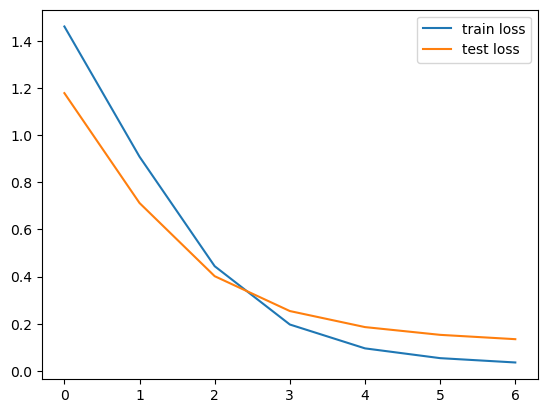

In [14]:
# plot loss per epoch
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='test loss')
plt.legend()

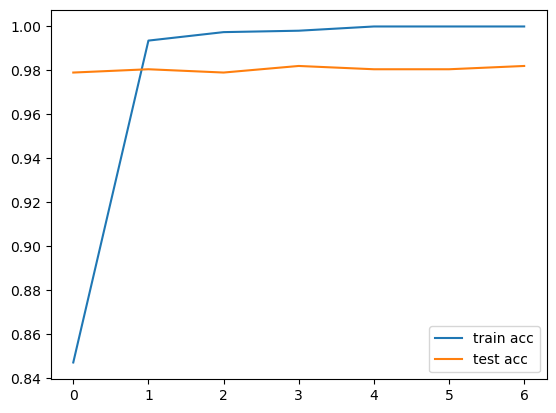

In [15]:
# accuracy per iteration
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='test acc')
plt.legend()